In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:


# Reutilizando a função f(x) e rk4_si_step(x, dt) fornecidas anteriormente
def f(x):
    return 1 - x - ((5*x) / (12 + 4*x))

def rk4_si_step(x, dt):
    k1_s = dt * f(x)
    k2_s = dt * f(x + dt/2 * k1_s)
    k3_s = dt * f(x + dt/2 * k2_s)
    k4_s = dt * f(x + dt * k3_s)
    x_next = x + (k1_s + 2 * k2_s + 2 * k3_s + k4_s) / 6
    return x_next

# Parâmetros iniciais
x0 = 0
tn = 4
n_steps = 32

# Arrays para armazenar os valores de dataframes de x e t
dfs = []

# Executando o RK4 para vários passos
for it in range(0,9):
    dt = (tn)/(n_steps*(2**it))
    xs = [x0]
    ts = [0]
    for i in range(1, n_steps*(2**it)+1):
        ts.append(i*dt)
        xs.append(rk4_si_step(xs[-1], dt))
        df_x = pd . DataFrame ({
        't': ts ,
        'x': xs 
        })
    dfs.append(df_x)



In [110]:
dfs[6]

,t,x
0,0.000000,0.000000
1,0.001953,0.001953
2,0.003906,0.003901
3,0.005859,0.005843
4,0.007812,0.007780
...,...,...
2044,3.992188,0.745467
2045,3.994141,0.745478
2046,3.996094,0.745490
2047,3.998047,0.745501


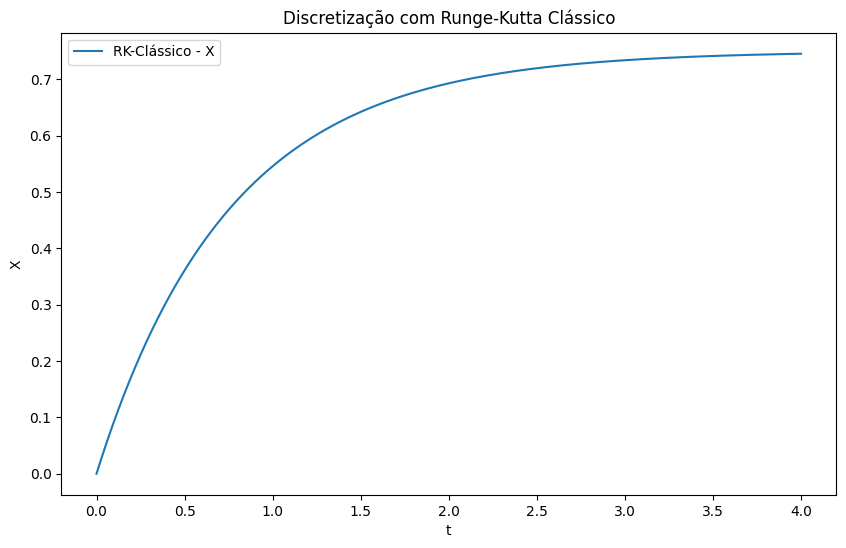

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(ts, xs, '-', label='RK-Clássico - X')


plt.xlabel('t')

plt.ylabel('X')
plt.title('Discretização com Runge-Kutta Clássico')
plt.legend()
plt.show()


In [99]:
def gera_tabela2(dfs):
    n = [2**5,2**6,2**7,2**8,2**9,2**10,2**11,2**12,2**13]
    x_ordem = []
    for i in range(len(dfs) - 2):
        x_ordem.append( (dfs[i]['x'].iloc[-1] - dfs[i+1]['x'].iloc[-1]) / (dfs[i+1]['x'].iloc[-1] - dfs[i+2]['x'].iloc[-1]))
       
        
    x_ordem.append('---')
    x_ordem.append('---')
    print(x_ordem)
    tabela_erro2 = pd.DataFrame({
        'n' : n,
        'Ordem P' : x_ordem
    })
    
    return tabela_erro2


   

In [100]:
tabela2 = gera_tabela2(dfs)
tabela2

[1.6922857935034756, 1.8467026675216782, 1.923264917715978, 1.9615866903573247, 1.9807791057558612, 1.9903856567605378, 1.9951918130031008, '---', '---']


,n,Ordem P
0,32,1.692286
1,64,1.846703
2,128,1.923265
3,256,1.961587
4,512,1.980779
5,1024,1.990386
6,2048,1.995192
7,4096,---
8,8192,---


In [ ]:
dfs[2].to_csv('RK.csv')